# Kernel Support Vector Machine

## Importing the Libraries

In [14]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the Dataset

In [15]:
dataset=pd.read_csv("Social_Network_Ads.csv")
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

## Spliting the Dataset

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
print(X_test)
print(y_test)

[[    35  71000]
 [    35  53000]
 [    33  60000]
 [    32 117000]
 [    32 135000]
 [    30 107000]
 [    52 138000]
 [    43 112000]
 [    34  43000]
 [    47  34000]
 [    41  60000]
 [    30  49000]
 [    45  26000]
 [    26  35000]
 [    59  83000]
 [    24  89000]
 [    41  72000]
 [    35  50000]
 [    27  31000]
 [    39 134000]
 [    26  80000]
 [    26  32000]
 [    22  18000]
 [    30  80000]
 [    36  99000]
 [    54 108000]
 [    29  83000]
 [    57  60000]
 [    35  55000]
 [    52 114000]
 [    48  30000]
 [    18  68000]
 [    38 113000]
 [    31  74000]
 [    57  26000]
 [    30  79000]
 [    50  88000]
 [    30  62000]
 [    35  79000]
 [    24  84000]
 [    38 112000]
 [    37  93000]
 [    46  22000]
 [    28  89000]
 [    48  90000]
 [    49  36000]
 [    47  47000]
 [    49  28000]
 [    19  85000]
 [    37  33000]
 [    58  38000]
 [    52  21000]
 [    23  28000]
 [    34  25000]
 [    46  79000]
 [    25  22000]
 [    35  44000]
 [    60 102000]
 [    18  8600

## Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Training the Model On Training Set

In [18]:
from sklearn.svm import SVC
classifier=SVC(kernel="rbf")
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## Prediciting a New Result

In [19]:
classifier.predict(sc.transform([[60,46000]]))

array([1])

## Prediciting the Test dataset

In [20]:
y_pred=classifier.predict(X_test)

## Making a Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[59  8]
 [ 3 30]]
0.89


## Visualing the Training Set Results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


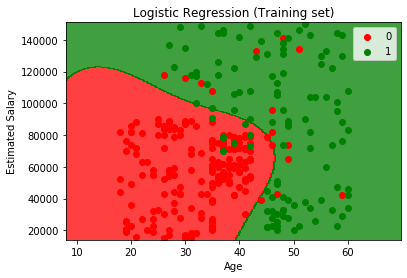

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualing the Test Set Results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


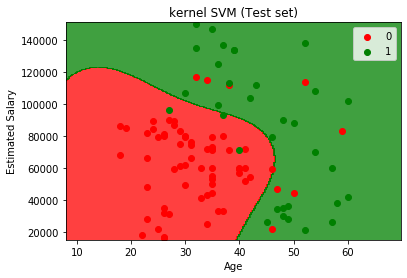

In [23]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()